#  Wine Quality Data Set  
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
from os import path
%matplotlib inline


In [2]:
red_wines = pandas.read_csv(path.realpath('winequality-red.csv'), delimiter=';', error_bad_lines=False)
white_wines = pandas.read_csv(path.realpath('winequality-white.csv'), delimiter=';', error_bad_lines=False)
red_wines.columns = [c.replace(' ', '_') for c in red_wines.columns]
white_wines.columns = [c.replace(' ', '_') for c in white_wines.columns]

#### Spradzamy wielkość zbioru czerwonych win.

In [3]:
len(red_wines)

1599

Zbiór czerwonych win składa się z 1599 rekordów.

#### Spradzamy wielkość zbioru białych win.

In [4]:
len(white_wines)

4898

Zbiór czerwonych win składa się z 4898 rekordów.

Łączna ilość rekordów w zbiorze to 6497, białe wina stanowią 75% zbioru (4898), a wina czerwone około 25% (1599).

#### Sprawdzamy ilość kolumn opisujących wina czerwone.

In [5]:
red_wines.shape

(1599, 12)

#### Sprawdzamy ilość kolumn opisujących wina białe.

In [6]:
white_wines.shape

(4898, 12)

Liczba kolumn opisujących wina białe i czerwone jest taka sama i wynosi 12.

#### Dane jakie zawierają się w kolumnach dla win:

In [39]:
white_wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Kolumny zawierają dane na temat kwasowości wina, ilości cukru, chlorków, siarki, alkoholu, "gęstość" wina oraz ocenę.

In [40]:
red_wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Kolumny dla win białych zawierają te same kolumny co dla win czerwonych.

W zbiorze win białych wyróżnia się ilość siarczanów, wartości są 2-3 razy większę niż dla wina czerwonego.
Średnia wartość alkoholu oraz ocen wina pokrywa się dla obu rodzajów win.
Wina czerwone są średnio bardziej kwaśne od win białych. Wina białe ze to są "słodsze", średnio około 3 krotnie słodsze od czerwnych.
Wina czerwone średnio zawierają więcej siarczanów oraz chlorków niż białe.

#### Wartości liczbowe ocen w skali o 0 do 10 przypisane do białych win:

In [9]:
white_wines.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Najniższa ocena wina to 3, win takich było 20 i stanowią one 0,4% zboiru win białych.
Najwyżej ocenione wino otrzymało ocene 9, takich win było 5 i stanowią one 0,1% zbioru win białych.
Najwięcej win otrzymało ocenę 6, stanowią one 45% zbioru.

#### Wykres przedstawiający zależność oceny białych win do ich ilości:

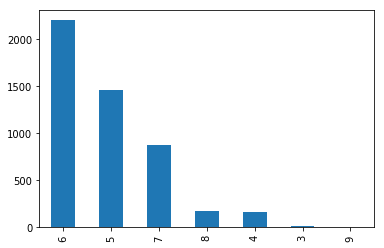

In [10]:
white_wines.quality.value_counts().plot.bar()

Możemy tu zobaczyć jak bardzo duży procent ocen oscyluje w okół najliczniejszej z ocen tj. 6. 
Oceny 5 i 7 są jej bezpośrednimi sąsiadami. Razem stanowią one większość procętową wykresu.

#### Wartości liczbowe ocen w skali o 0 do 10 przypisane do czerwonych win:

In [11]:
red_wines.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Najniższa ocena wina to 3, win takich było 10 i stanowią one 0,6% zboiru win białych.
Najwyżej ocenione wino otrzymało ocene 8, takich win było 18 i stanowią one 1,1% zbioru win białych.
Najwięcej win otrzymało ocenę 5 i 6, stanowią one odpowiednio 42,5% oraz 40%.

#### Wykres przedstawiający zależność oceny czerwonych win do ich ilości:

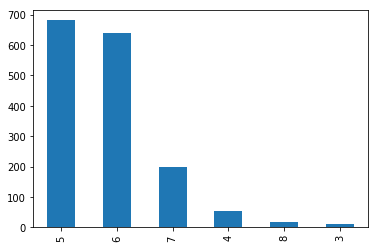

In [12]:
red_wines.quality.value_counts().plot.bar()

Oceny 5 i 6 dominują w przypadku win czerwonych, stanowią one ponad 80% wszystkich ocen. Kolejną po nich oceną jest 7, która również wyróżnia się znaczącą ilośćią na tle innych ocen.

Wartości wspólne:
- Wina białe oraz czerwone posiadają najwięcej ocen 5 i 6. W obu przypadkach wartość 7 jest trzecią największą wartością.
- Wina nie posiadają oceny niższej niż 3.
Różnice:
- Wina białe posiadają więcej wyższych ocen niż wina czerwone.
- Wina czerwone nie uzyskłay oceny wyższej niż 8, gdzie wina białe posiadają najwyższą ocenę 9.
- Najwżej ocenianych win czerwonych jest więcej niż win białych jeśli chodzi o porównanie procentowego udziału w zbiorze.

#### Relacja zawartości alkoholu do ilości białych win.

In [13]:
white_wines.alcohol.value_counts().nlargest(30)

9.4     229
9.5     228
9.2     199
9.0     185
10.0    162
10.5    160
11.0    158
10.4    153
9.1     144
9.8     136
10.8    135
9.3     134
10.2    130
9.6     128
11.4    121
10.1    114
10.6    114
11.2    112
9.9     109
8.8     107
9.7     105
12.0    102
11.3    101
10.7     96
8.9      95
10.9     88
11.5     88
12.2     86
10.3     85
12.5     83
Name: alcohol, dtype: int64

W zbiorze czerwonych win dominują wina o ilości alkoholu 9-10%. 

#### Relacja zawartości alkoholu do ilości czerwonych win.

In [14]:
red_wines.alcohol.value_counts().nlargest(30)

9.5     139
9.4     103
9.8      78
9.2      72
10.5     67
10.0     67
11.0     59
9.3      59
9.6      59
9.7      54
9.9      49
10.9     49
10.1     47
10.2     46
10.8     42
10.4     41
11.2     36
10.3     33
11.4     32
11.3     32
11.5     30
9.0      30
11.8     29
10.6     28
10.7     27
11.1     27
9.1      23
11.7     23
12.0     21
12.5     21
Name: alcohol, dtype: int64

W zbiorze czerwonych win dominują wina o ilości alkoholu 9-11%. 

#### Wykres "butelki" do wartości dla win białego.

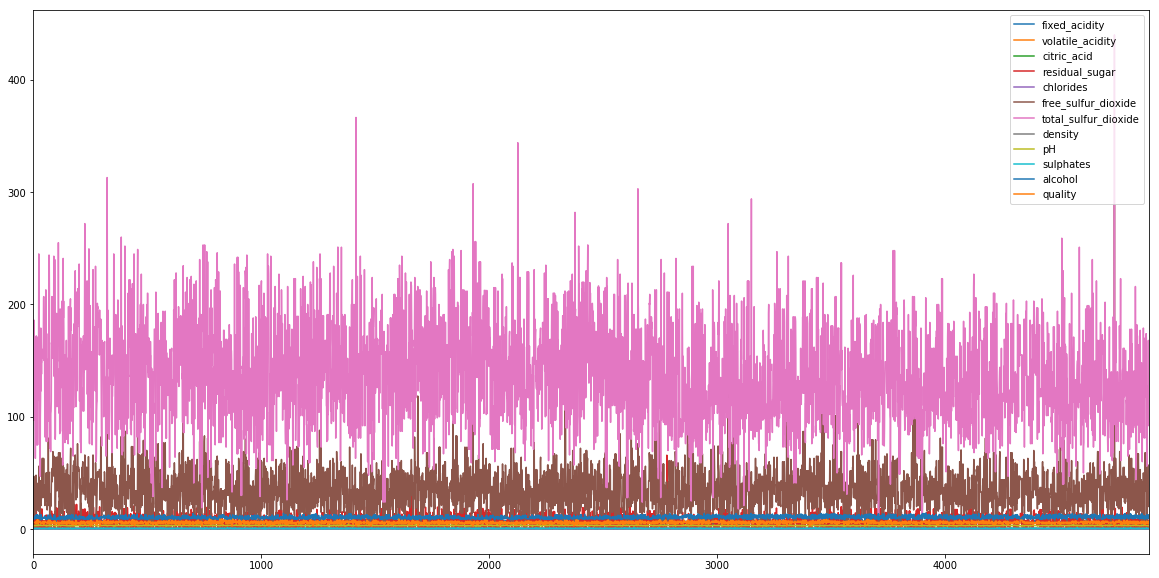

In [42]:
white_wines.plot(figsize=(20,10))

#### Wykres "butelki" do wartości dla win czerwonego.

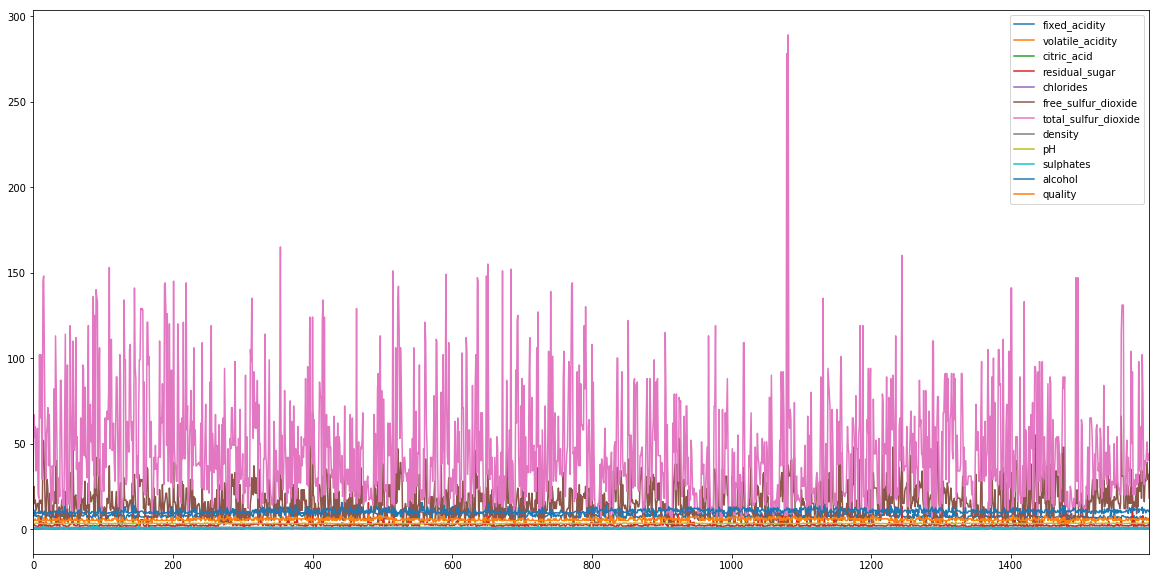

In [43]:
red_wines.plot(figsize=(20,10))

#### Wykres jakości wina do poszczególnej butelki dla wina białego.

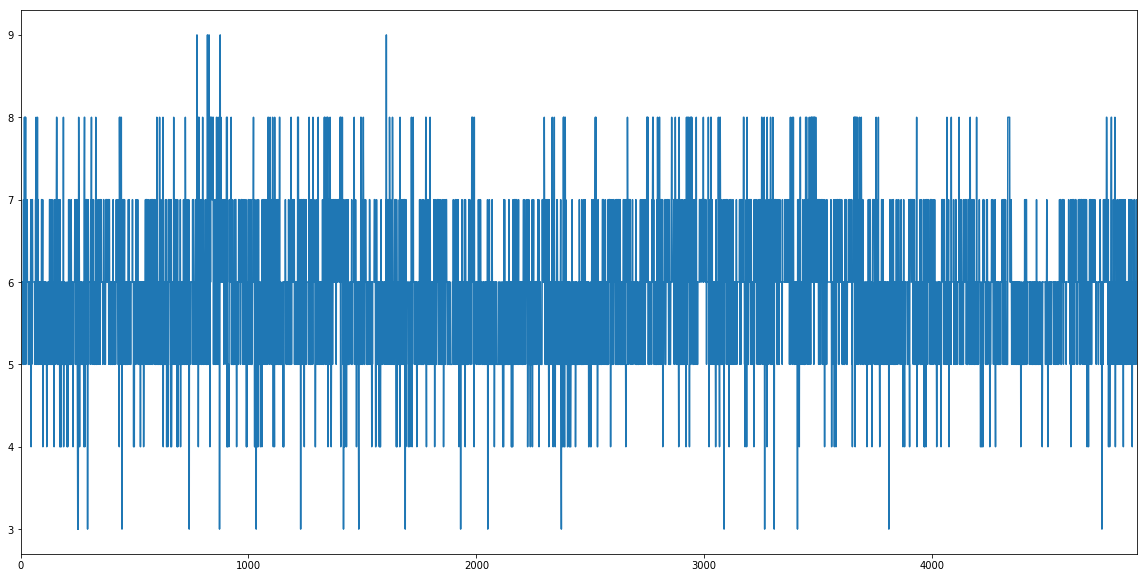

In [44]:
white_wines['quality'].plot(figsize=(20,10))

#### Wykres jakości wina do poszczególnej butelki dla wina czerwonego.

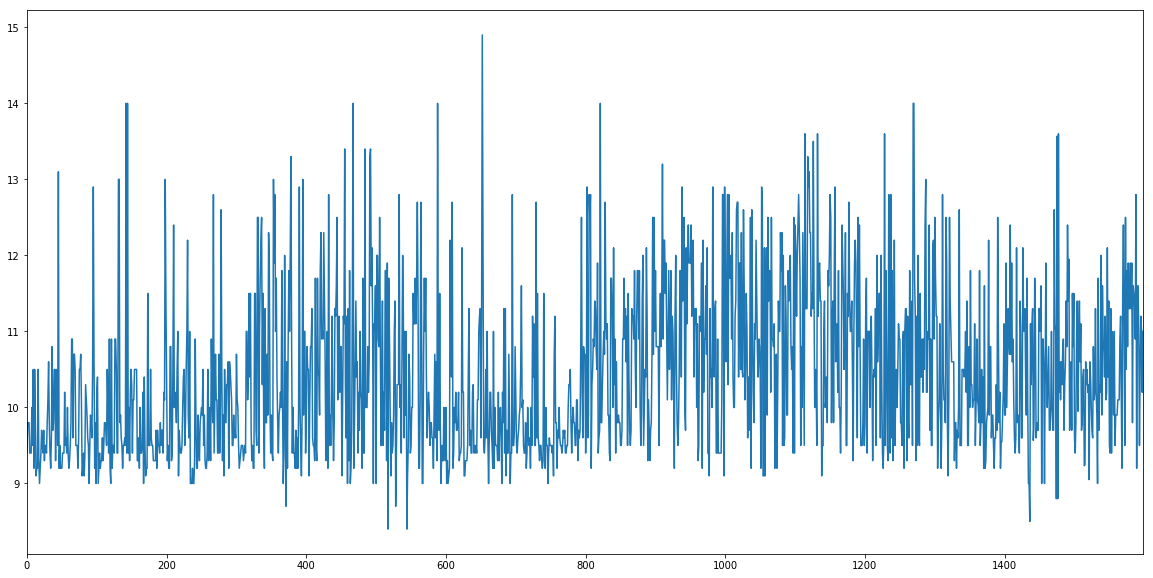

In [45]:
red_wines['alcohol'].plot(figsize=(20,10))

#### Wykres oceny wina białego, posortowany według ocen. 

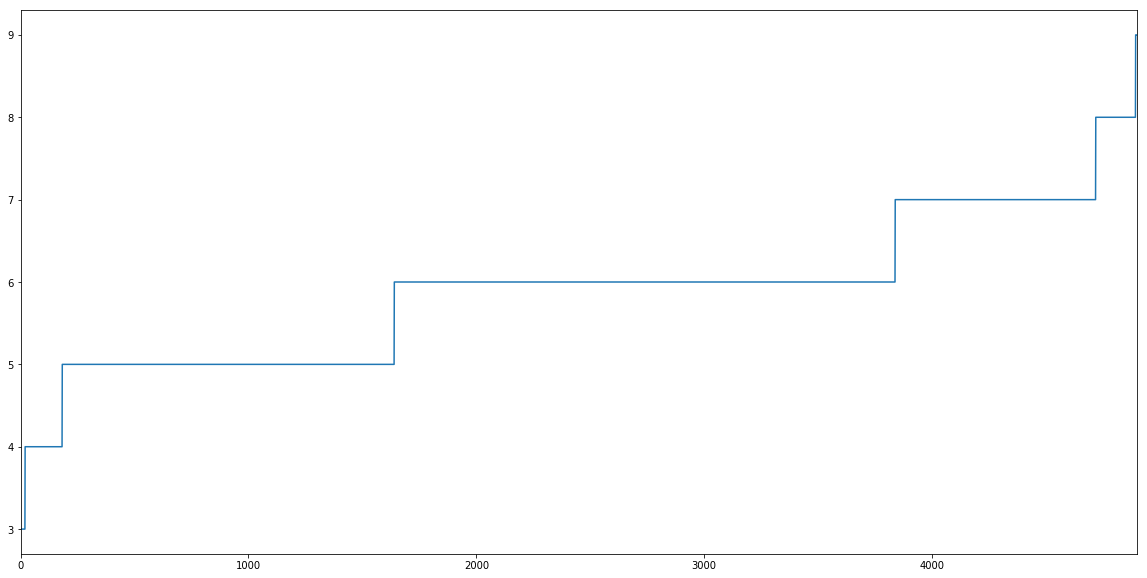

In [46]:
white_wines_sorted_by_quality = white_wines.sort_values(by=['quality'])
white_wines_sorted_by_quality['quality'].plot(use_index=False, figsize=(20,10))

#### Wykres oceny wina czerwonego, posortowany według ocen. 

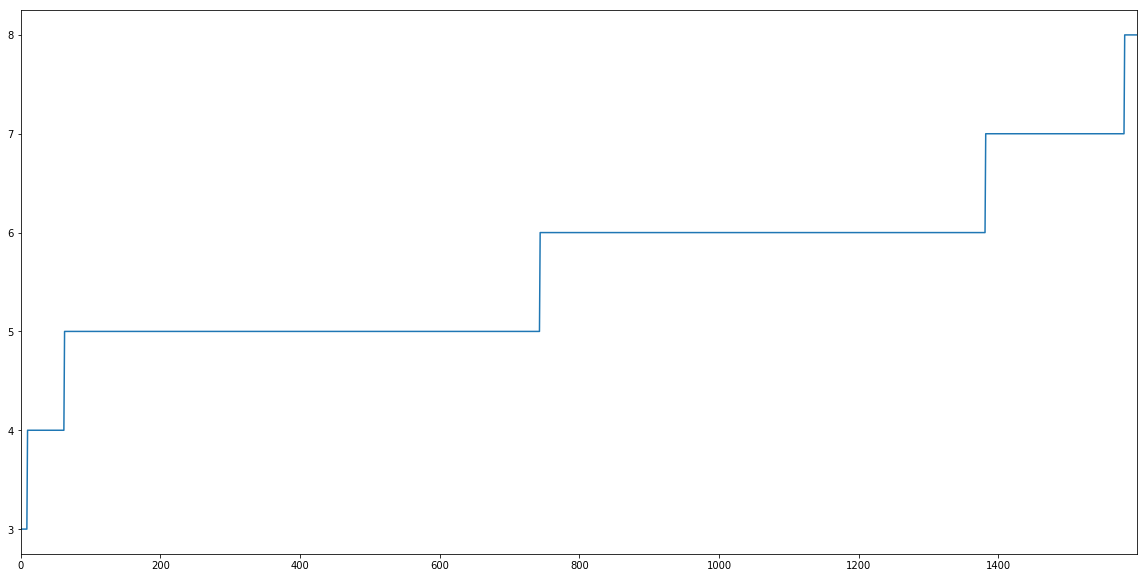

In [48]:
red_wines_sorted_by_quality = red_wines.sort_values(by=['quality'])
red_wines_sorted_by_quality['quality'].plot(use_index=False, figsize=(20,10))

#### Wykres zawartości alkoholu wina białego, posortowany według ilości alkoholu. 

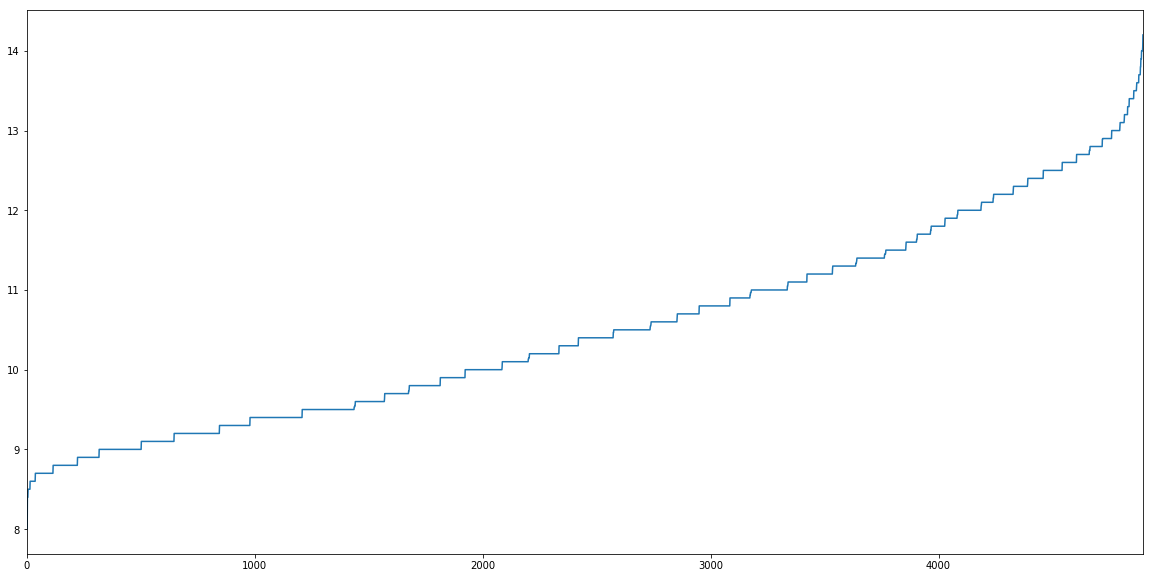

In [49]:
white_wines_sorted_by_alcohol = white_wines.sort_values(by=['alcohol'])
white_wines_sorted_by_alcohol['alcohol'].plot(use_index=False, figsize=(20,10))

#### Wykres zawartości alkoholu wina czerwonego, posortowany według ilości alkoholu. 

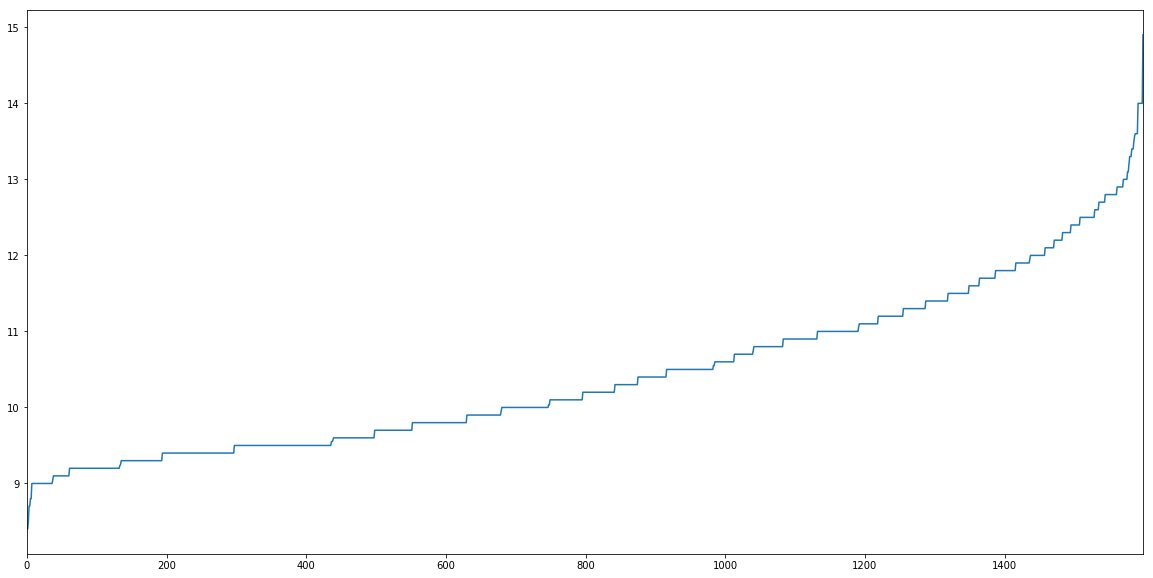

In [47]:
red_wines_sorted_by_alcohol = red_wines.sort_values(by=['alcohol'])
red_wines_sorted_by_alcohol['alcohol'].plot(use_index=False, figsize=(20,10))

#### Ilość sztuk według zawartości alkoholu w butelce dla win białych.

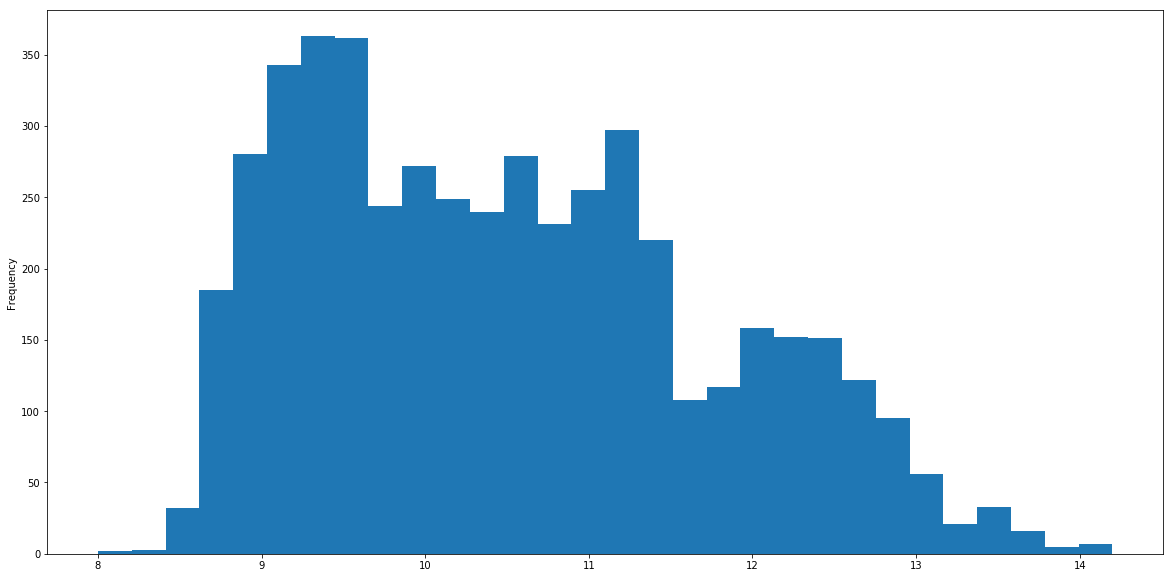

In [50]:
white_wines.alcohol.plot(kind = 'hist', bins=30, figsize=(20,10))

#### Ilość sztuk według PH wina dla win czerwonych.

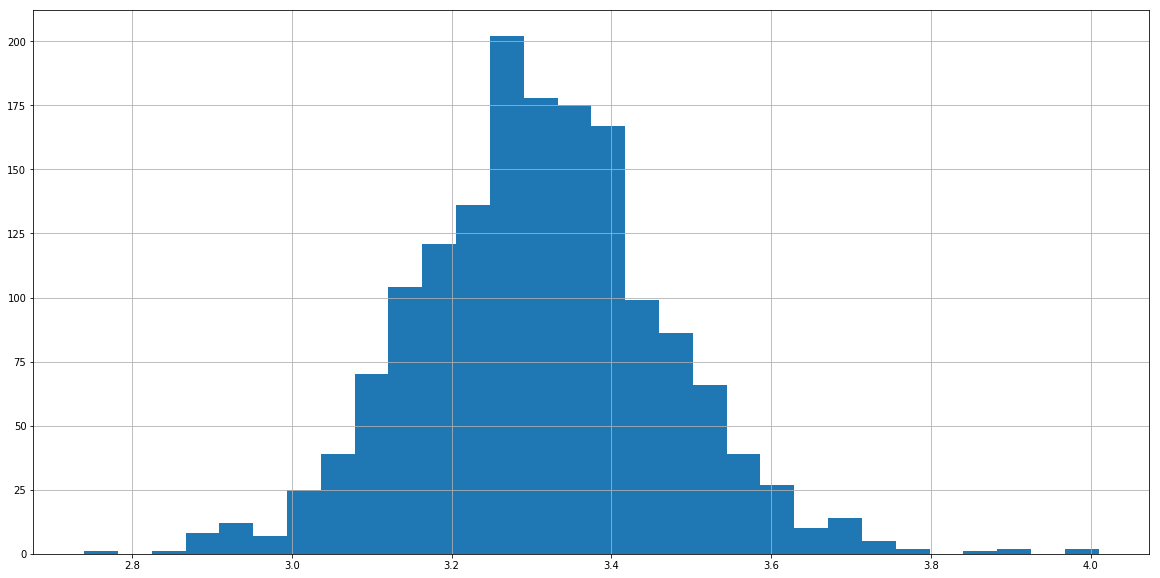

In [51]:
red_wines.pH.hist(bins=30, figsize=(20,10))

#### Ilość sztuk według zawartości cukru w butelce dla win czerwonych.

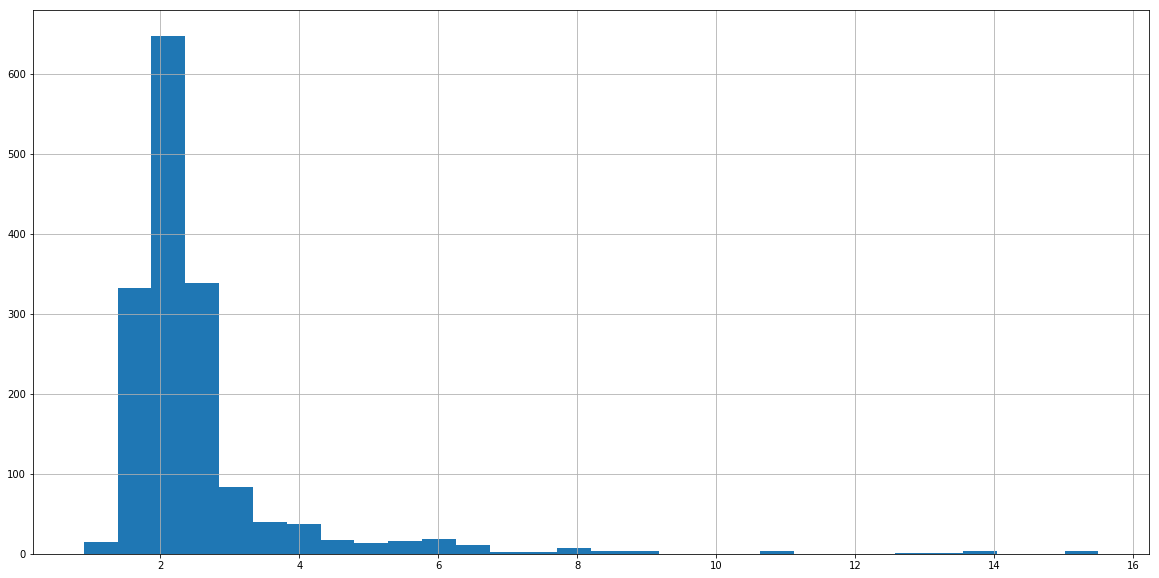

In [52]:
red_wines.residual_sugar.hist(bins=30, figsize=(20,10))

#### Ilość sztuk według gęstości dla ilości butelek win czerwonych.

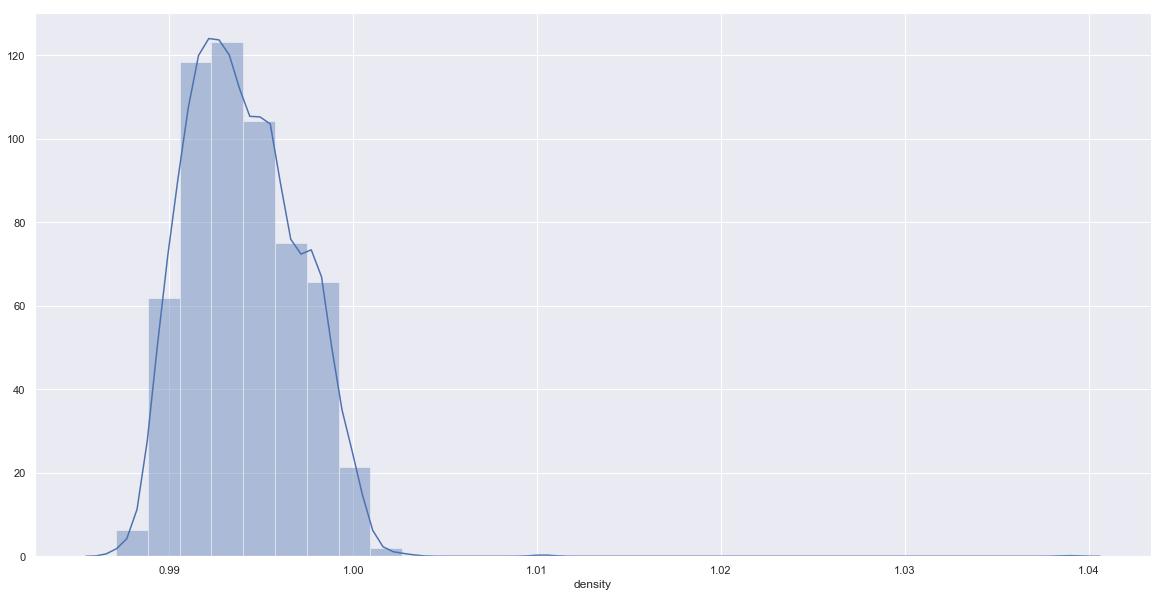

In [63]:
seaborn.set(rc={"figure.figsize": (20, 10)})
seaborn.distplot(white_wines.density, bins=30)

#### Ilość sztuk według gęstości dla ilości butelek win białych.

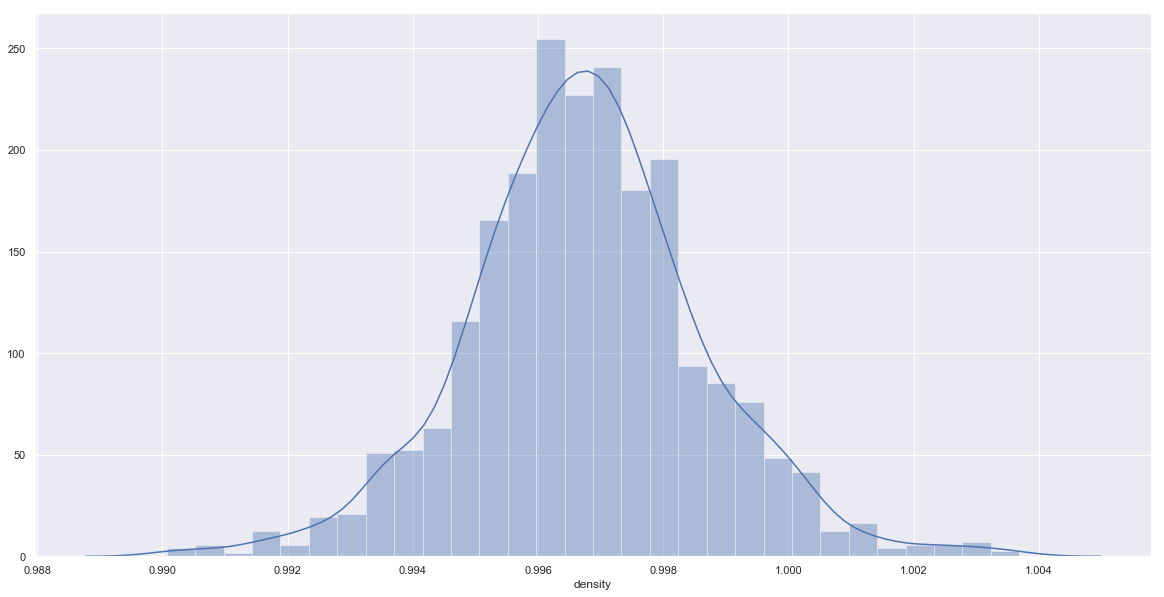

In [64]:
seaborn.distplot(red_wines.density, bins=30)

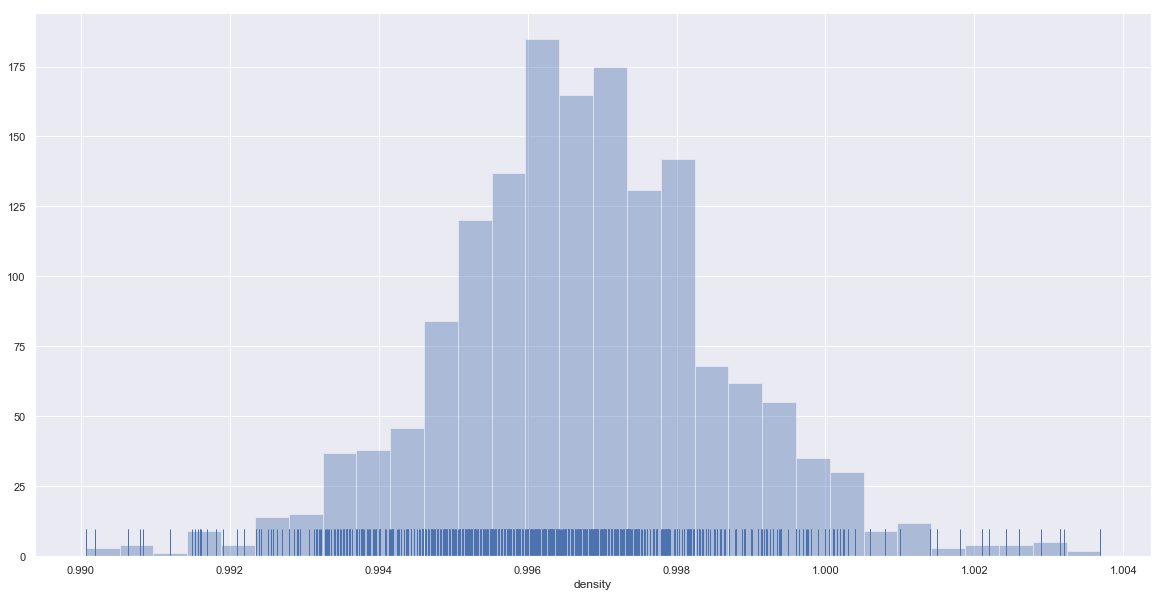

In [65]:
seaborn.distplot(red_wines.density, bins=30, kde=False, rug=True)

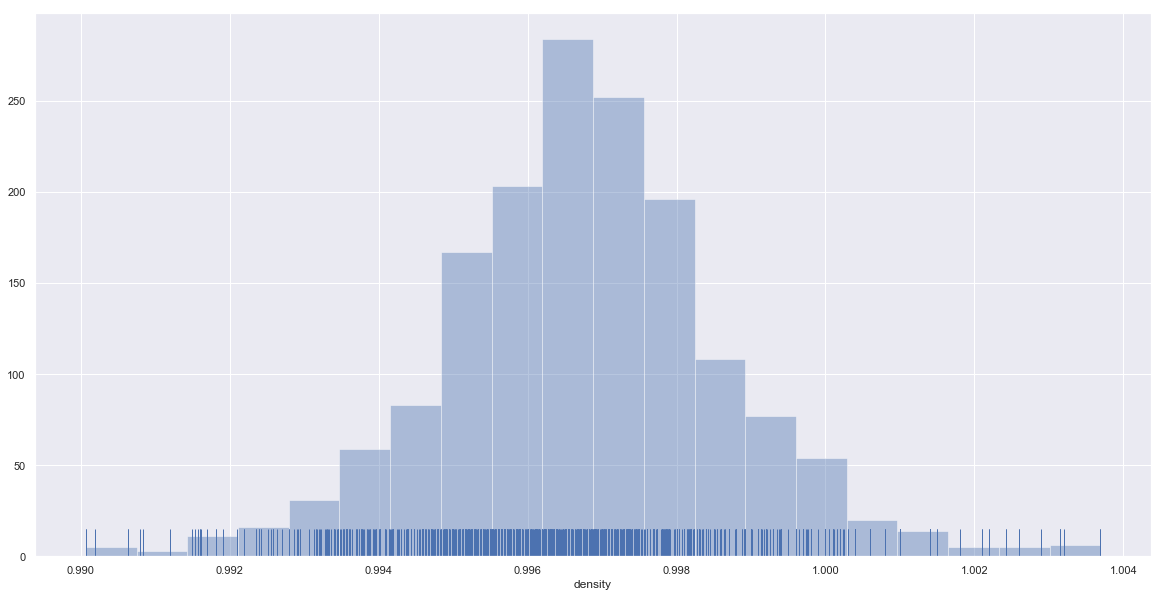

In [66]:
seaborn.distplot(red_wines.density, bins=20, kde=False, rug=True)

#### Ilośc sztuk win białych dla danej oceny wina.

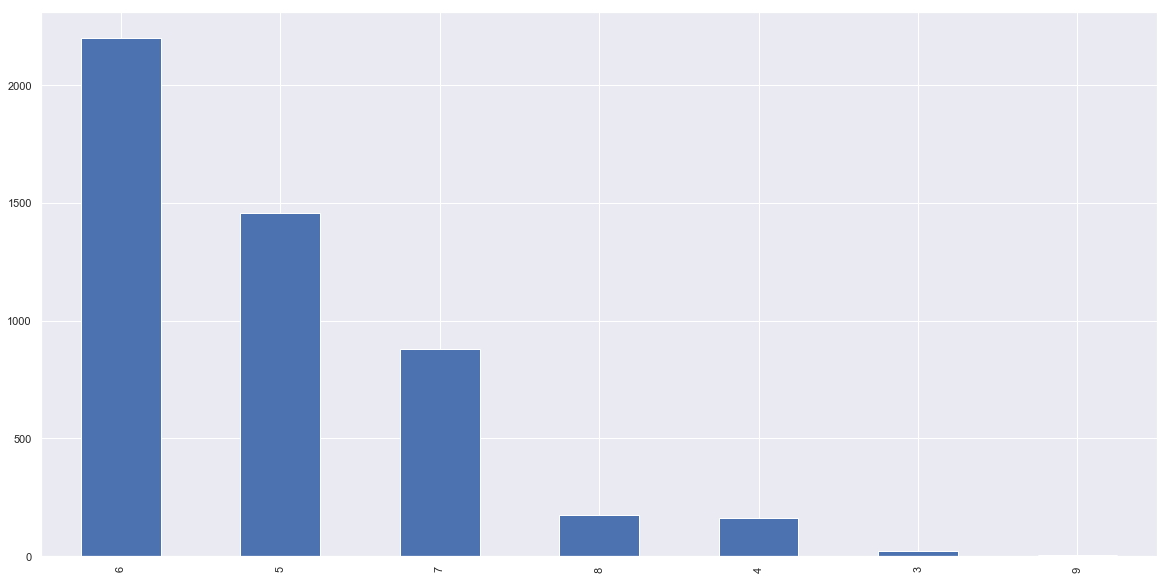

In [67]:
white_wines.quality.value_counts().plot.bar()

#### Porównanie ilości alkoholu i oceny uzyskanej przez wino dla win białych.

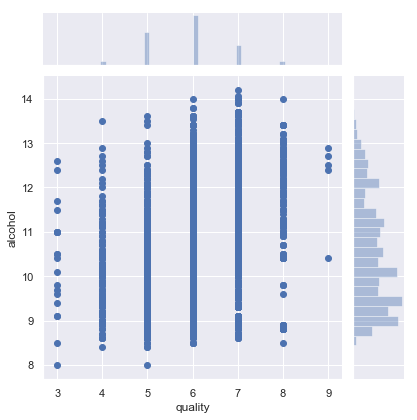

In [68]:
seaborn.jointplot(x=white_wines['quality'], y=white_wines['alcohol'])

#### Porównanie ilości alkoholu i oceny uzyskanej przez wino dla win czerwnych.

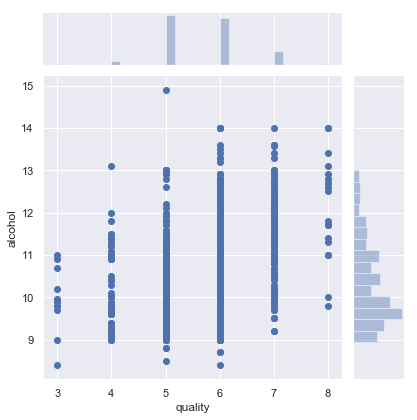

In [69]:
seaborn.jointplot(x=red_wines['quality'], y=red_wines['alcohol'])

#### Korelacja dla win białych.

In [33]:
white_wines.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


#### Korelacja dla win czerwonych.

In [34]:
red_wines.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Korelacja dla win białych przedstawiona jako heatmap.

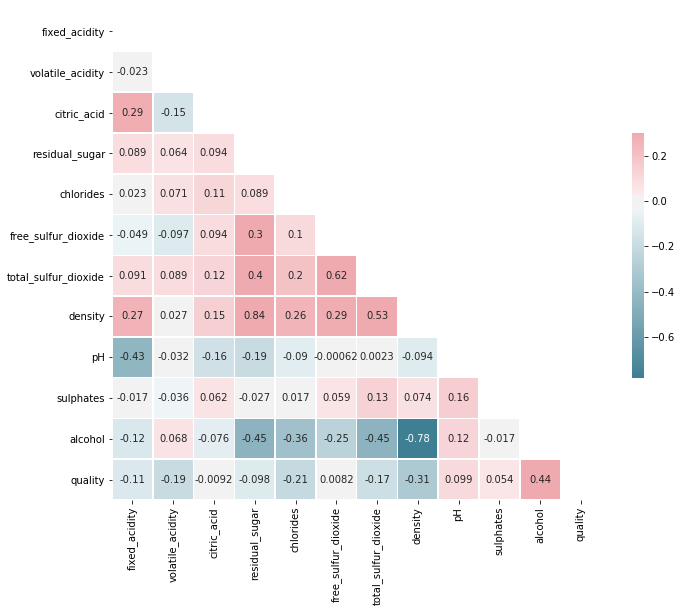

In [35]:
white_corr = white_wines.corr()

# Generate a mask for the upper triangle
mask = numpy.zeros_like(white_corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and white_correct aspect ratio
seaborn.heatmap(white_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Korelacja dla win czerwonych przedstawiona jako heatmap.

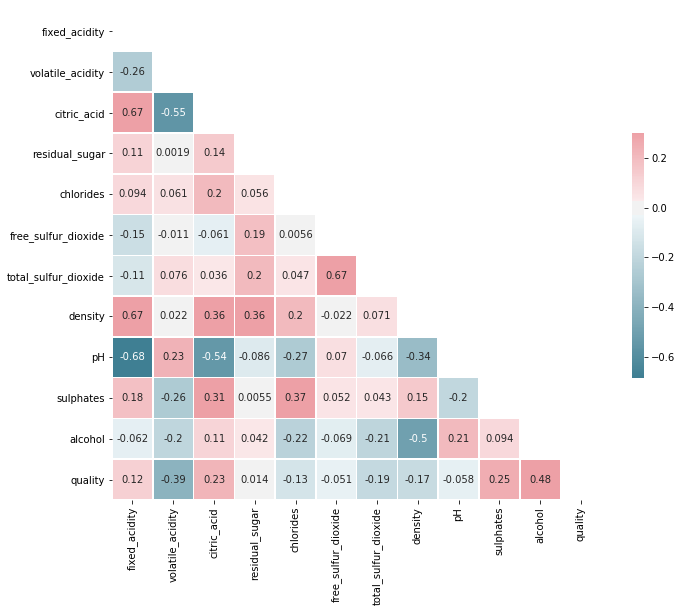

In [36]:
red_corr = red_wines.corr()

# Generate a mask for the upper triangle
mask = numpy.zeros_like(red_corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and red_correct aspect ratio
seaborn.heatmap(red_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Porównanie zawartości alkoholu do oceny uzyskanej przez wino czerwone.

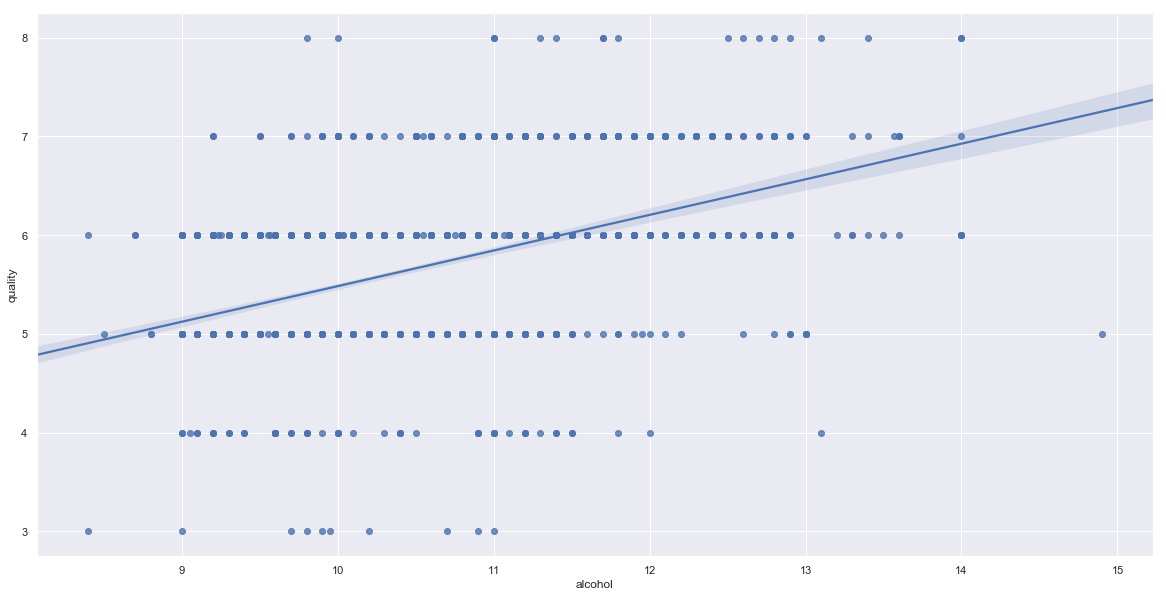

In [70]:
seaborn.regplot(red_wines.alcohol, red_wines.quality)

#### Porównanie zawartości alkoholu do gęstości dla win białych.

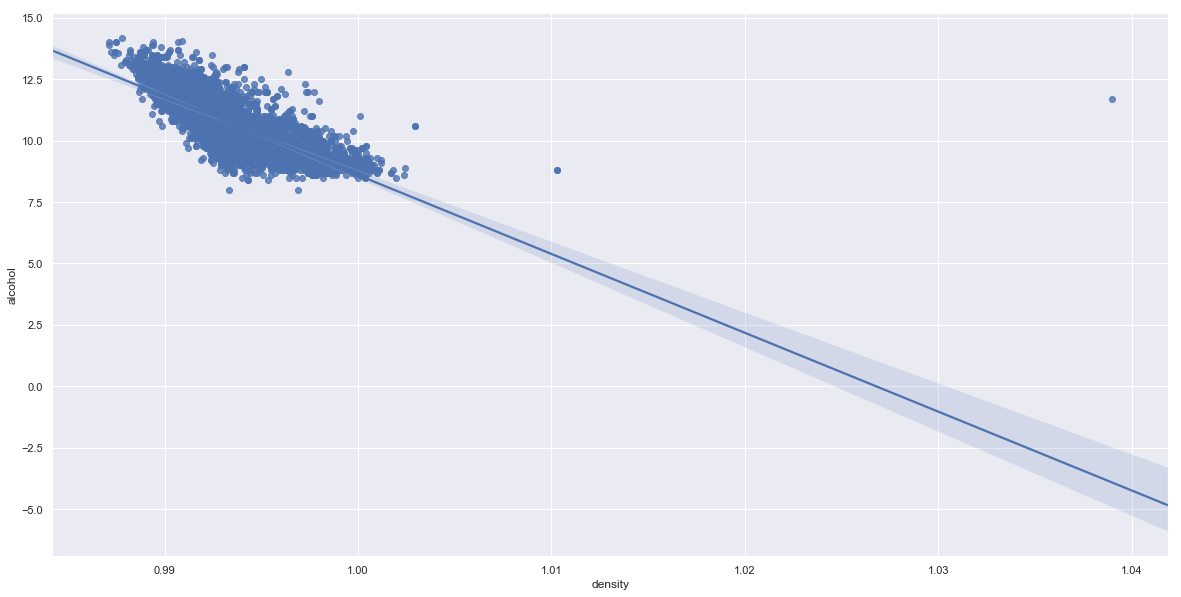

In [71]:
seaborn.regplot(white_wines.density, white_wines.alcohol)